In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from tensorflow.python.keras.callbacks import TensorBoard
import tensorflow as tf
from datetime import datetime

Using TensorFlow backend.


In [2]:
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [3]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [4]:
'''from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))'''

'from google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))'

In [5]:
train = pd.read_csv('./Multi_Label_dataset/train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [7]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:33<00:00, 217.18it/s]


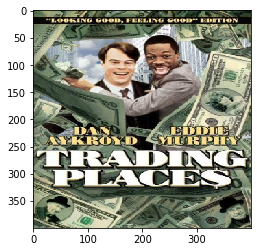

In [8]:
plt.imshow(X[2])

In [9]:

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [10]:
train['Genre'][2]

"['Comedy']"

In [11]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [13]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64,verbose=1,callbacks=[tensorboard_callback])

Train on 6528 samples, validate on 726 samples
Epoch 1/10
6528/6528 [==============================] - 750s 115ms/step - loss: 0.3756 - accuracy: 0.8513 - val_loss: 0.2577 - val_accuracy: 0.9061
Epoch 2/10
6528/6528 [==============================] - 705s 108ms/step - loss: 0.2793 - accuracy: 0.9018 - val_loss: 0.2532 - val_accuracy: 0.9067
Epoch 3/10
6528/6528 [==============================] - 706s 108ms/step - loss: 0.2660 - accuracy: 0.9056 - val_loss: 0.2469 - val_accuracy: 0.9061
Epoch 4/10
6528/6528 [==============================] - 708s 108ms/step - loss: 0.2600 - accuracy: 0.9072 - val_loss: 0.2473 - val_accuracy: 0.9067
Epoch 5/10
6528/6528 [==============================] - 697s 107ms/step - loss: 0.2550 - accuracy: 0.9082 - val_loss: 0.2565 - val_accuracy: 0.9061
Epoch 6/10
6528/6528 [==============================] - 706s 108ms/step - loss: 0.2526 - accuracy: 0.9080 - val_loss: 0.2570 - val_accuracy: 0.9061
Epoch 7/10
6528/6528 [==============================] - 710s 109m

In [17]:
img = image.load_img('GOT.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

FileNotFoundError: [Errno 2] No such file or directory: 'GOT.jpg'

In [20]:
model.save('my_model.h5')

Drama (0.519)
Action (0.263)
Thriller (0.241)


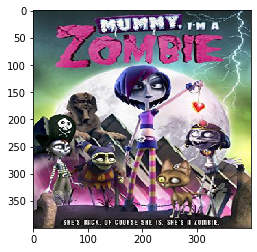

In [18]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)


In [ ]:
model=load_model('./static/my_model_GPU.h5')

In [1]:
img = image.load_img('titanic.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

NameError: name 'image' is not defined

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)